In [1]:
import matplotlib.pyplot as plt
from math import *
import numpy as np
from random import randint

Generating points

In [2]:
def create_points(number,inf=0,sup=50):
    return [[randint(inf,sup),randint(inf,sup)] for i in range(number)]

def polar_angle(p0,p1=None):
    if p1 == None:
        p1 = anchor
    y_span = p0[1] - p1[1]
    x_span = p0[0] - p1[0]
    return atan2(y_span,x_span)

def distance(p0,p1 = None):
    if p1 == None:
        p1 = anchor
    y_span = p0[1] - p1[1]
    x_span = p0[0] - p1[0]
    return x_span**2 + y_span**2

def hull_plot(pts, convex_hull = None):
    xs,ys = zip(*pts)
    plt.scatter(xs,ys)
    if convex_hull !=None:
        for i in range(1,len(convex_hull)+1):
            if i == len(convex_hull):
                i=0
            c0 = convex_hull[i-1]
            c1 = convex_hull[i]
            plt.plot((c0[0],c1[0]),(c0[1],c1[1]),'r')
    plt.show()

def det(p1,p2,p3):
    return (p2[0] - p1[0])*(p3[1] - p1[1]) - (p2[1] - p1[1])*(p3[0] - p1[0])

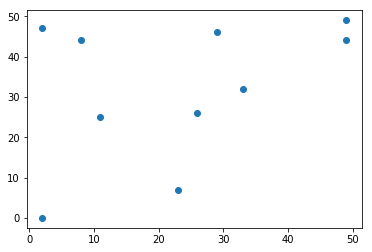

In [50]:
hull_plot(create_points(10))


In [3]:
def inicial_point(points):
    Min_ind= None
    for i, (x, y) in enumerate(points):
    
        if Min_ind == None or y < points[Min_ind][1]:
            Min_ind = i
    
        if y ==points[Min_ind][1] and x < points[Min_ind][0]:
            Min_ind = i
    return Min_ind

In [4]:
def quicksort(pts):
    if len(pts) <=1:
        return pts
    smaller, equal, larger = [],[],[]
    pivot = polar_angle(pts[randint(0, len(pts)-1)])
    for pt in pts:
        pt_angle=polar_angle(pt)
        if pt_angle < pivot:
            smaller.append(pt)
        elif pt_angle == pivot:
            equal.append(pt)
        else:
            larger.append(pt)
    
    return quicksort(smaller) + sorted(equal,key=distance) + quicksort(larger)
    
    

In [5]:
def graham_scan(pts,show_progress = False):
    global anchor
    min_index=inicial_point(pts)
    
    anchor = pts[min_index]
    
    sorted_points = quicksort(pts)
    del sorted_points[sorted_points.index(anchor)]
    hull = [anchor, sorted_points[0]]
    for s in sorted_points[1:]:
        while det(hull[-2],hull[-1],s) <= 0:
            del hull[-1]
            if len(hull)<2: break
        #print("ss")
        hull.append(s)
        if show_progress: hull_plot(pts,hull)
    return hull   
        

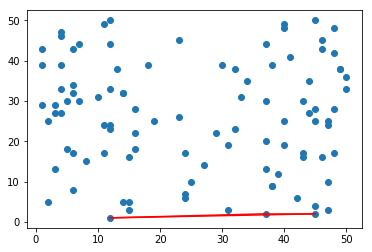

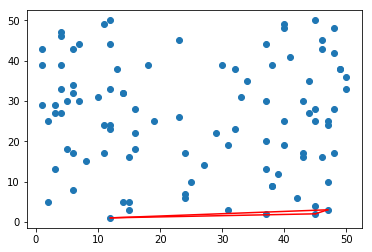

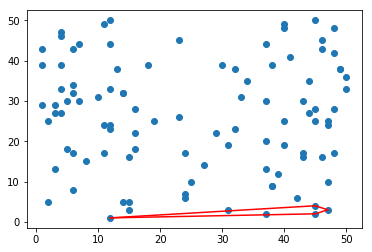

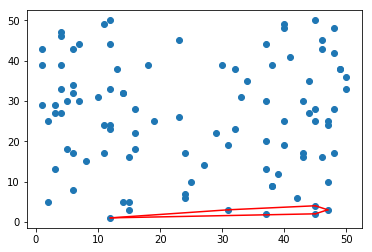

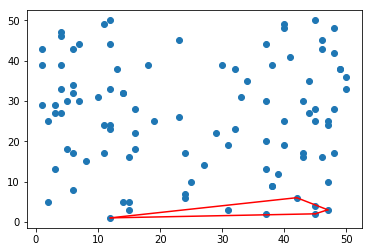

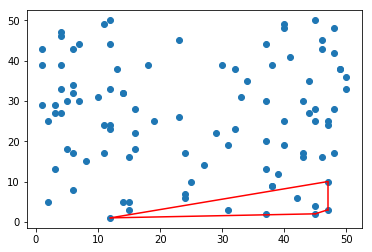

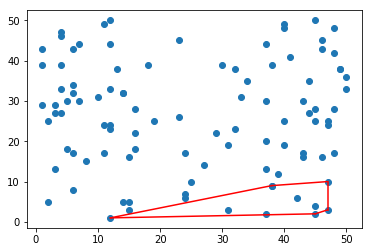

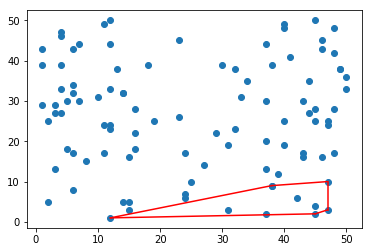

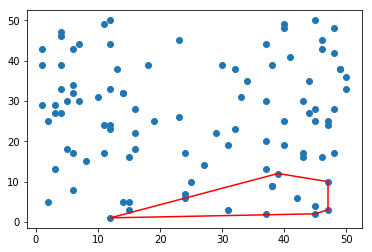

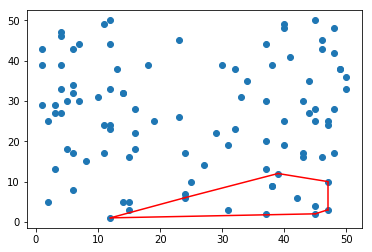

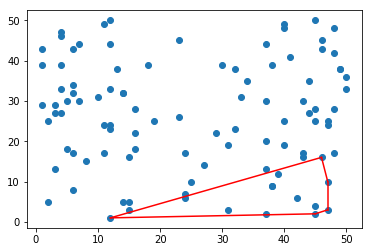

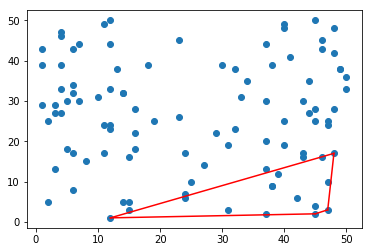

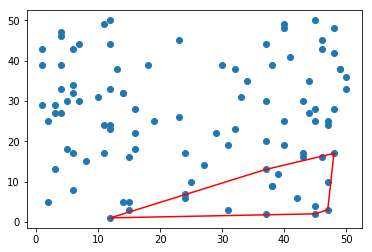

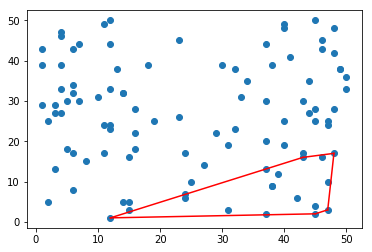

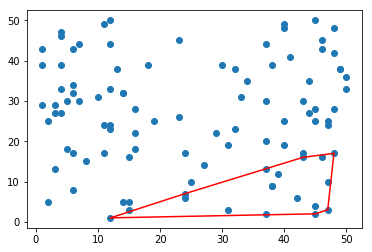

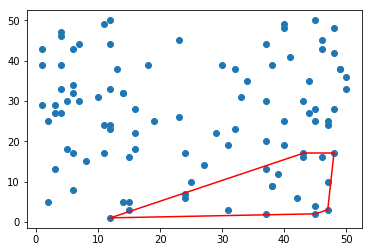

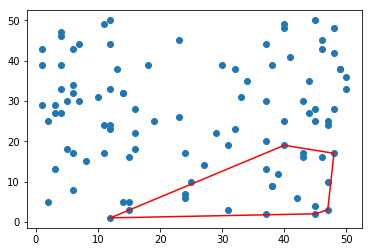

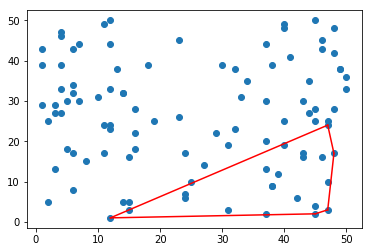

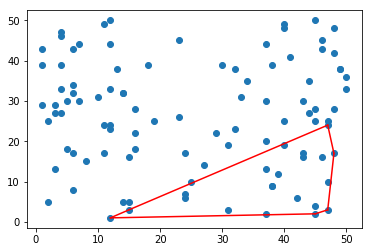

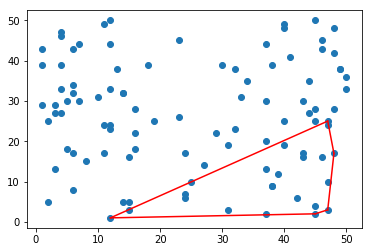

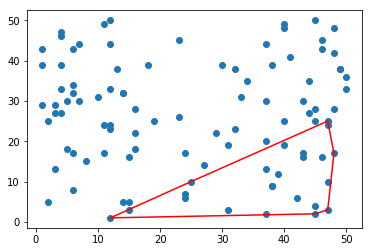

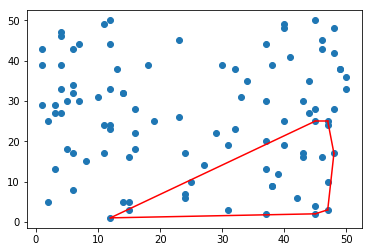

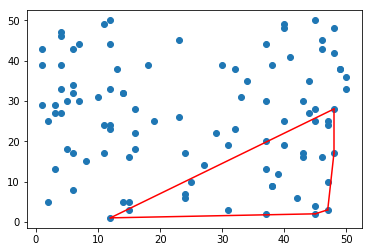

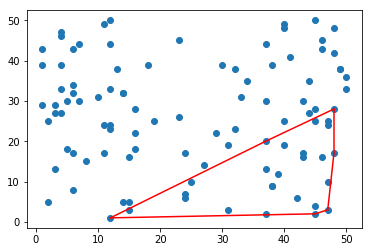

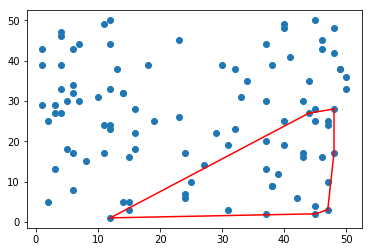

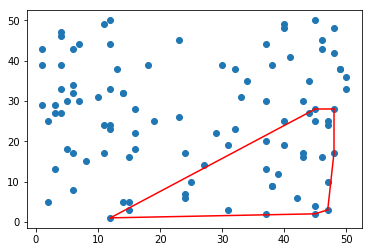

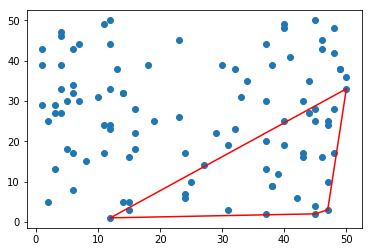

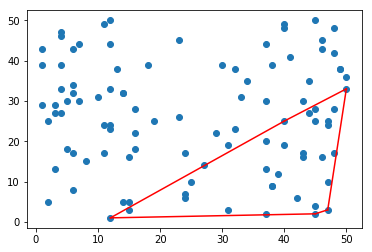

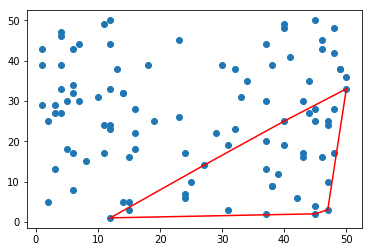

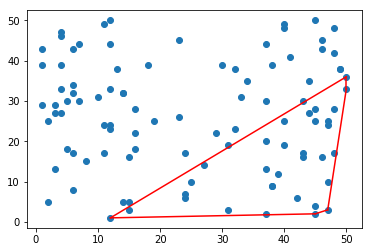

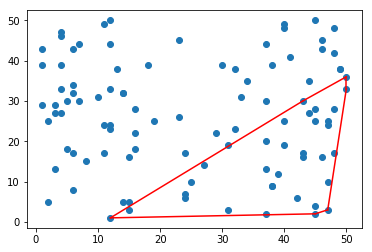

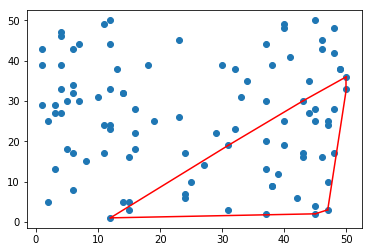

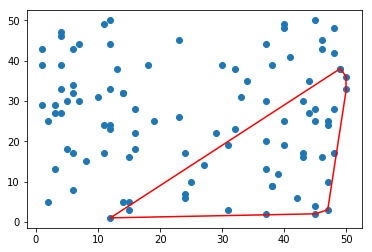

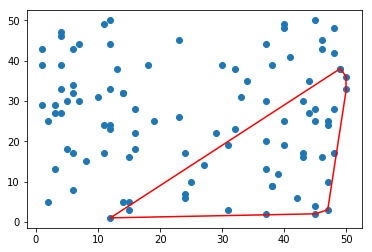

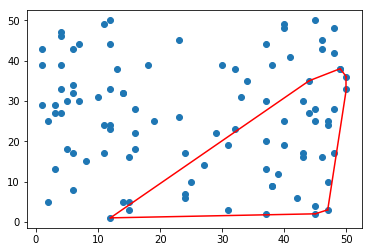

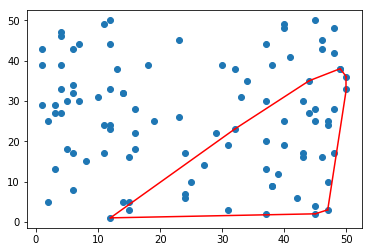

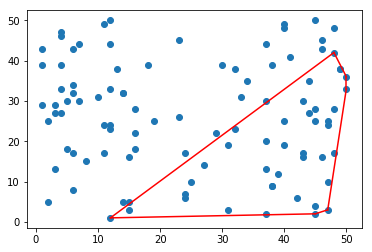

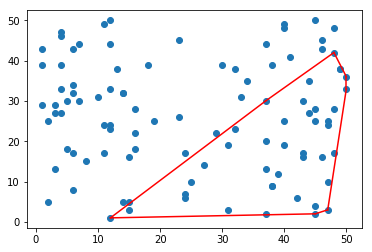

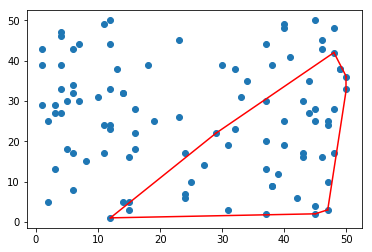

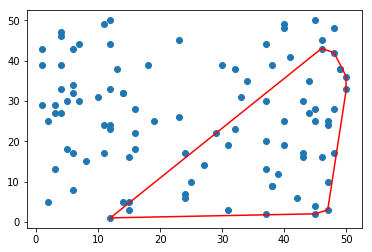

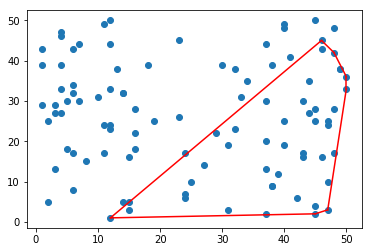

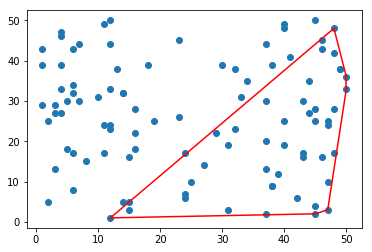

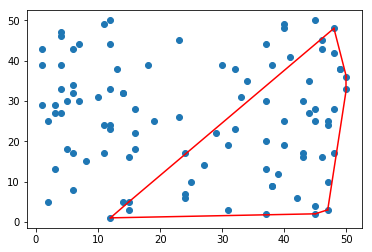

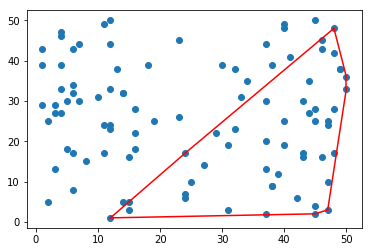

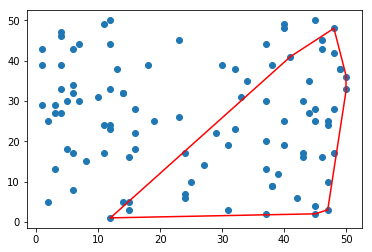

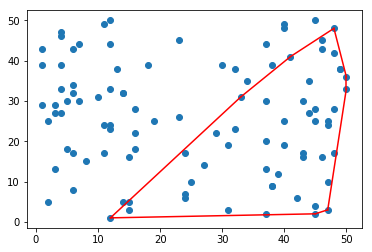

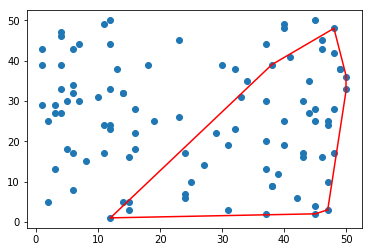

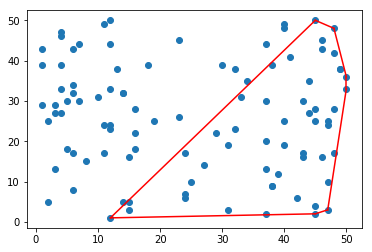

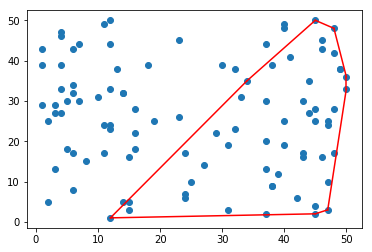

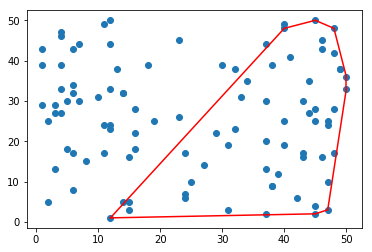

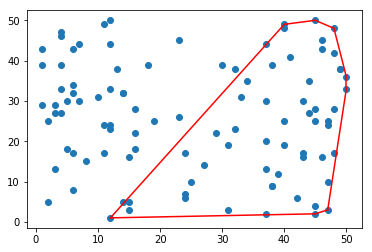

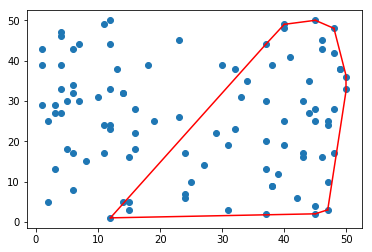

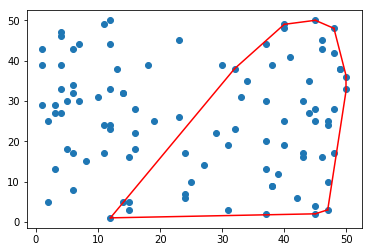

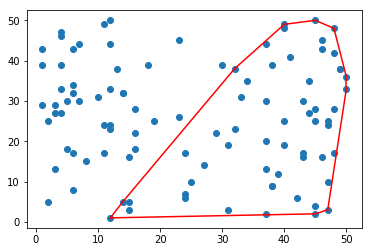

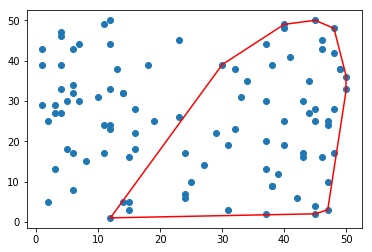

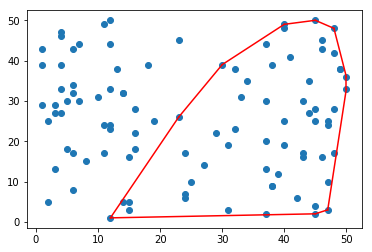

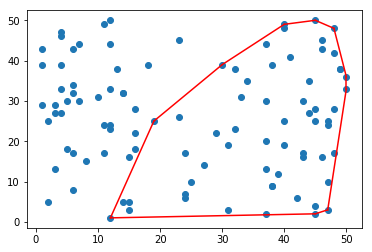

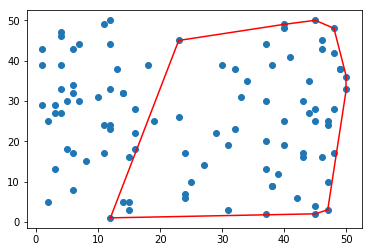

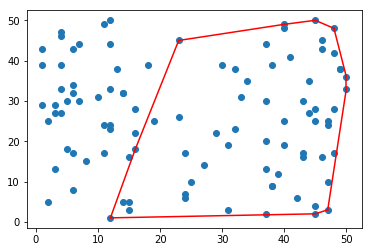

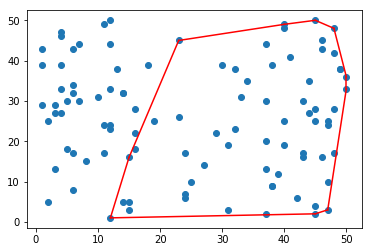

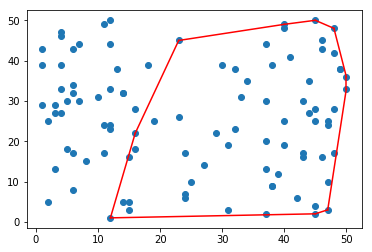

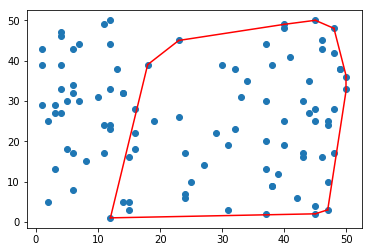

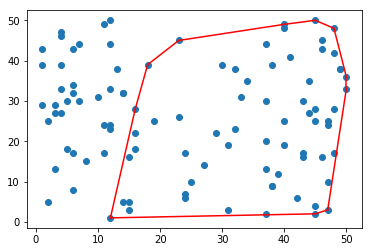

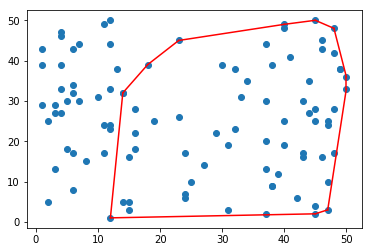

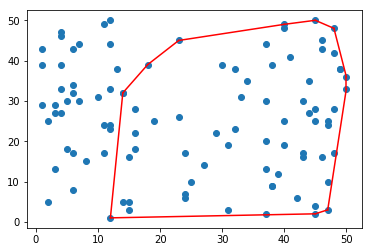

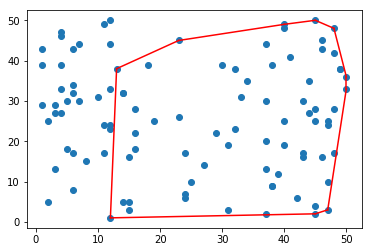

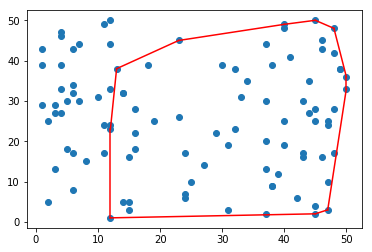

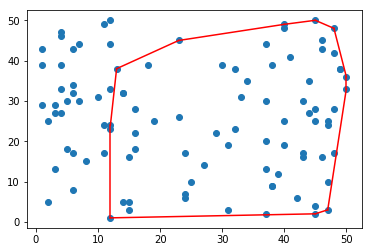

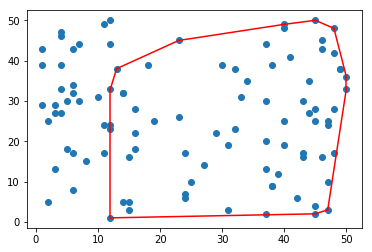

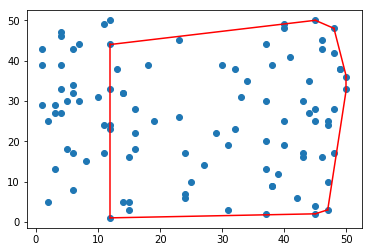

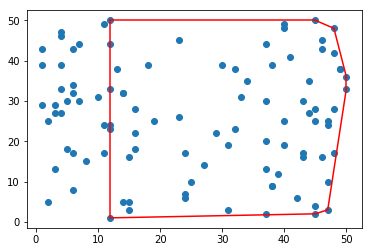

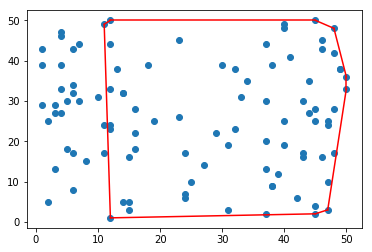

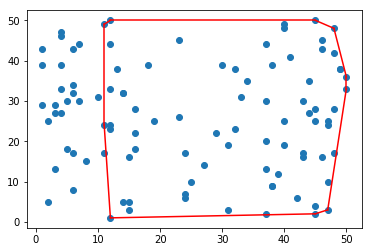

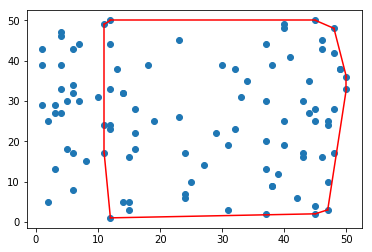

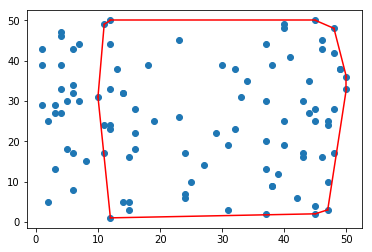

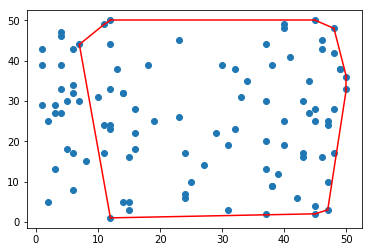

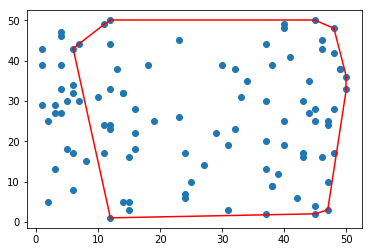

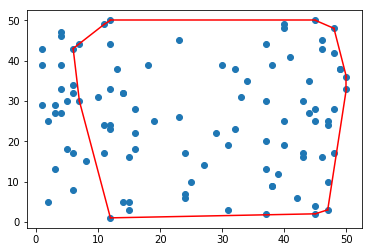

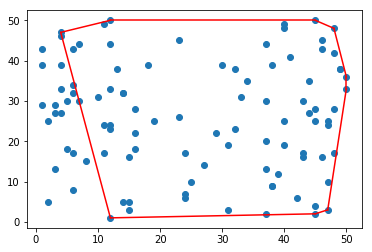

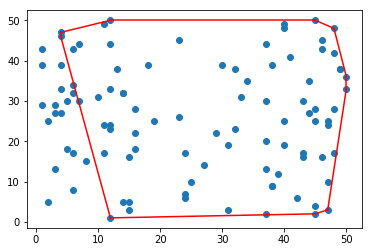

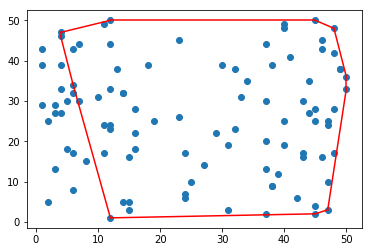

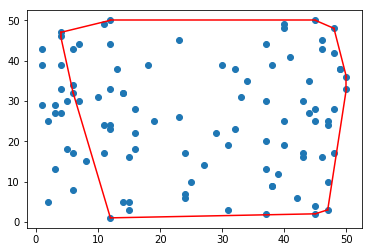

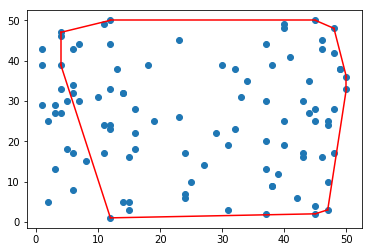

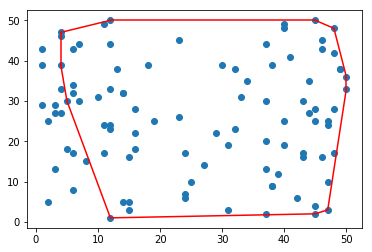

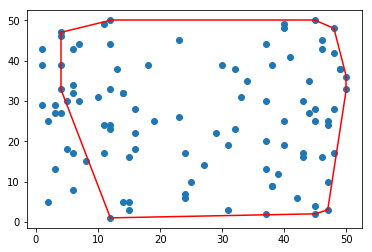

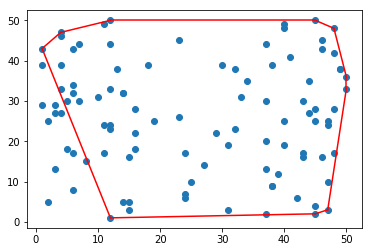

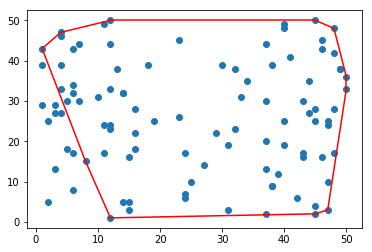

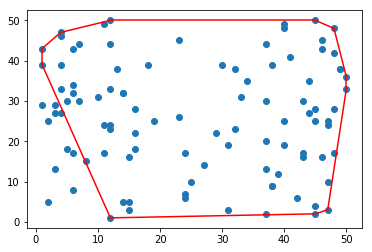

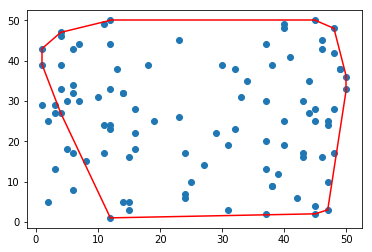

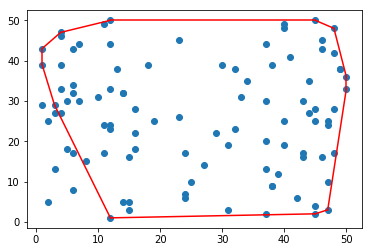

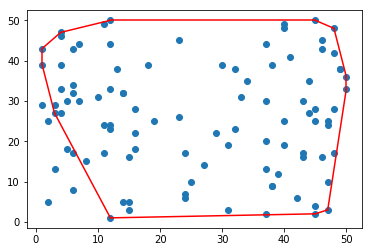

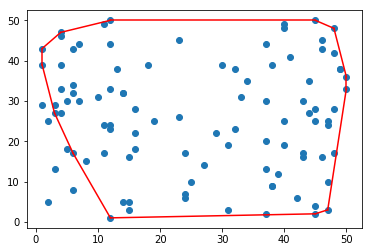

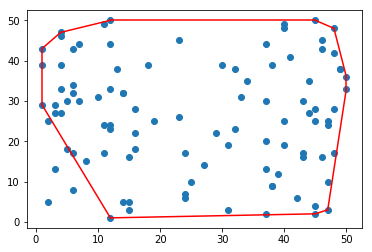

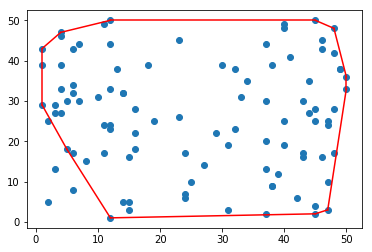

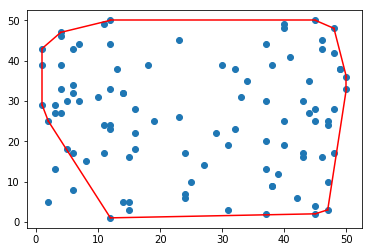

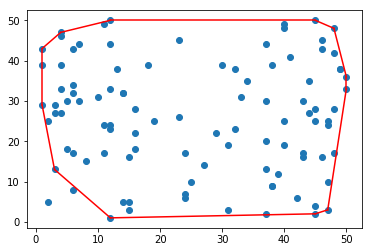

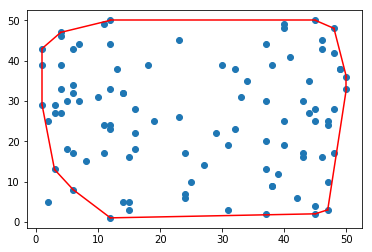

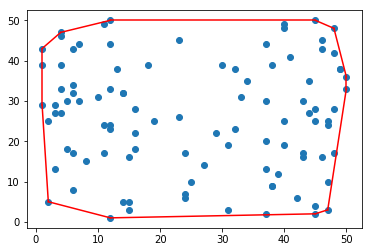

In [6]:
points = create_points(100)
hull = graham_scan(points,True)


[[9, 3], [32, 12]]